<img src="https://github.com/alan-barzilay/NLPortugues/blob/master/imagens/logo_nlportugues.png?raw=true"  style="height:65%" align="right">


# Lista 9 -  Convoluções
**Nome:** Wesley Seidel Carvalho

**Numero Usp:** 6544342









______________




O objetivo desta lista é fazer com que vocês se familiarizem com redes convolucionais, vocês ja tiveram um contato breve com essa arquitetura algumas listas atrás mas dessa vez vocês cuidarão sozinhos da implementação e deverão tomar medidas para evitar overfitting. Novamente, as questões 1 2 e 3 podem ser copiadas de listas anteriores.

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tf.__version__

'2.2.0-rc3'

### Importando os dados como um dataframe

Para esta lista nós utilizaremos o dataset **B2W-Reviews01** que consiste em avaliações de mais de 130k compras online no site Americanas.com e [esta disponivel no github](https://github.com/b2wdigital/b2w-reviews01) sob a licensa CC BY-NC-SA 4.01.

In [13]:
# b2wCorpus = pd.read_csv("data/b2w-10k.csv")
B2W_DATAFILE = "/home/wseidel/workspaces/usp/b2w-reviews01/B2W-Reviews01.csv"
# b2wCorpus = pd.read_csv("/home/wseidel/workspaces/usp/b2w-reviews01/B2W-Reviews01.csv")
b2wCorpus = pd.read_csv(B2W_DATAFILE, sep=';', usecols=["review_text", "recommend_to_a_friend"])
# b2wCorpus = pd.read_csv(B2W_DATAFILE, sep=';')


# b2wCorpus.head()

/home/wseidel/virtualenvs/mac5725-NLP/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
b2wCorpus["review_text"]

0         Estou contente com a compra entrega rápida o ú...
1         Por apenas R$1994.20,eu consegui comprar esse ...
2         SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...
3         MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...
4         A entrega foi no prazo, as americanas estão de...
                                ...                        
132368    Vale muito, estou usando no controle do Xbox e...
132369    Prático e barato, super indico o produto para ...
132370    Chegou antes do prazo previsto e corresponde a...
132371    Material fraco, poderia ser melhor. Ficou deve...
132372    Comprei esse produto, quando chegou estava com...
Name: review_text, Length: 132373, dtype: object


### Pré-processamento
Seria util nos livrarmos das colunas que não são relevantes para o nosso problema e tambem verificar se não tem nada de esquisito nas colunas que vamos utilizar. 
Por exemplo, se fossemos utilizar a coluna "reviewer_gender" nós precisariamos nos livrar desses valores esquisitos:

In [16]:
b2wCorpus["reviewer_gender"].value_counts()

M    66166
F    62071
Name: reviewer_gender, dtype: int64

## <font color='blue'>Questão 1 </font>

a) Selecione apenas as colunas relevantes: "review_text" e "recommend_to_a_friend". 

b) Converta a coluna "recommend_to_a_friend" de uma coluna de `str` para uma coluna de `int`:

- "Yes"-> 1
- "No" -> 0


In [178]:
# Seu código aqui
df = b2wCorpus

df = df.assign(recommend_to_a_friend_new=0)
df['recommend_to_a_friend_new'] = df.recommend_to_a_friend.apply(lambda word : 1 if word == 'Yes' else 0)
# df = df.dropna()
df["recommend_to_a_friend_new"].value_counts()

1    96368
0    36005
Name: recommend_to_a_friend_new, dtype: int64

### Separando em teste e treino
## <font color='blue'>Questão 2 </font>

Agora com o dataset já pré-processado, separe o em 2 partes, um conjunto de teste e um conjunto de treino. Novamente você pode utilizar a função [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) do Scikit-Learn como na lista passada.

In [145]:
# Seu código aqui
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['review_text'].values, df['recommend_to_a_friend_new'].values, test_size=0.20, random_state=17)


### Tokenizando

Para alimentarmos os reviews a camada de embedding nós precisamos quebrar cada review em uma serie de tokens. Existem diversas maneiras de se realizar isso e poderiamos até mesmo usar outras bibliotecas como o spaCy. 

Por exemplo, o objeto [`Tokenizer`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer) oferece um método `tokenize` para quebrar as palavras em tokens individuais ao mesmo tempo que filtra caracteres indesejados (por default os caracteres filtrados são: !"#$\%&()*+,-./:;<=>?@[\\]^_\`{|}~\t\n).


Para essa lista utilizaremos a camada [`TextVectorization`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization) para automaticamente passar os reviews para caixa-baixa, extrair caracteres especiais e tokenizar as palavras de maneira a serem passadas para a camada de embedding. Ao tornarmos a etapa de tokenização uma camada de rede neural nós podemos incluir esse processamento dos reviews no proprio modelo.


## <font color='blue'>Questão 3 </font>
Utilizando a camada `TextVectorization` tokenize os inputs.
Declare a camada e então chame a função `adapt()` para adequar o seu vocabulário aos reviews.

Não se esqueça de se certificar que todas os reviews tenham o mesmo comprimento, seja por meio do uso de padding, truncamento ou uma mistura dos dois. Plotamos um histograma do comprimento dos reviews para lhe auxiliar nessa decisão.

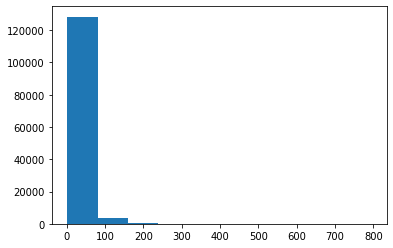

In [22]:
plt.hist([len(linha.split()) for linha in b2wCorpus["review_text"]])
plt.show()

In [175]:
# Seu código aqui

VOCAB_SIZE = 20000
EMBED_DIM = 64
TAMMAX_SENTENCE = 50

vectorize_layer = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=VOCAB_SIZE,
    standardize='lower_and_strip_punctuation', 
    output_mode='int', 
    output_sequence_length=TAMMAX_SENTENCE,
    name="TextVec_%d" % VOCAB_SIZE
)
vectorize_layer.adapt(x_train)

vectorize_layer([["Ola enfermeira gostei viu não"]])

<tf.Tensor: shape=(1, 50), dtype=int64, numpy=
array([[3129,    1,   43, 2701,    8,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]])>

### Montando o modelo

Agora vamos juntar a camada do tokenizador a nossa camada [Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) e definir o resto de nosso modelo.

##  <font color='blue'>Questão 4 </font>

Defina seu modelo.

Como analise de sentimentos pode ser visto como um problema de classificação, é interessante também registrar algumas métricas como acurácia `metrics=["acc"]` .

Seu modelo deve começar com a seguinte estrutura:
 - Camada de Input
 - Camada de Tokenização
 - Camada de Embedding
 
Já definimos as camadas seguintes da rede por você.
 
Atenção a dimensão do input da camada de embedding, lembre se que < OOV > e < PAD > possuem seus próprios tokens.


In [176]:
# Seu código aqui

import tensorflow.keras.layers as layers


input_layer = layers.Input(shape=(1,), dtype=tf.string, name="Input_shape1")
embedding_layer = layers.Embedding(VOCAB_SIZE+2, output_dim=EMBED_DIM, input_length=TAMMAX_SENTENCE, name="Emb_Zerado")

model = tf.keras.Sequential()

model.add(input_layer)
model.add(vectorize_layer)
model.add(embedding_layer)

model.add(layers.Conv1D(filters=16, kernel_size=25, activation='relu', padding='same'))
model.add(layers.MaxPooling1D(pool_size=2))

model.add(layers.Dropout(0.25))
model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dropout(0.25))

model.add(layers.Dense(1, activation='sigmoid'))


model.compile( "adam","binary_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
TextVec_20000 (TextVectoriza (None, 50)                0         
_________________________________________________________________
Emb_Zerado (Embedding)       (None, 50, 64)            1280128   
_________________________________________________________________
conv1d_32 (Conv1D)           (None, 50, 16)            25616     
_________________________________________________________________
max_pooling1d_27 (MaxPooling (None, 25, 16)            0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 25, 16)            0         
_________________________________________________________________
dense_48 (Dense)             (None, 25, 32)            544       
_________________________________________________________________
dropout_47 (Dropout)         (None, 25, 32)          

### Treinando e avaliando seu modelo

##  <font color='blue'>Questão 5 </font>

Com seu modelo definido, treine e avalie sua performance no conjunto de testes, utilize camadas [Conv1D](https://keras.io/api/layers/convolution_layers/convolution1d/) na sua rede.



In [177]:
# Seu código aqui

QNT_EPOCAS_A_TREINAR = 30

history = model.fit(x_train, y_train, batch_size=128, epochs=QNT_EPOCAS_A_TREINAR)

loss, accuracy = model.evaluate(x=x_test,y=y_test)

Epoch 1/30
828/828 [==============================] - 54s 66ms/step - loss: 0.4183 - accuracy: 0.8278
Epoch 2/30
828/828 [==============================] - 56s 68ms/step - loss: 0.3741 - accuracy: 0.8497
Epoch 3/30
828/828 [==============================] - 58s 70ms/step - loss: 0.3598 - accuracy: 0.8560
Epoch 4/30
828/828 [==============================] - 58s 70ms/step - loss: 0.3477 - accuracy: 0.8612
Epoch 5/30
828/828 [==============================] - 58s 70ms/step - loss: 0.3358 - accuracy: 0.8665
Epoch 6/30
828/828 [==============================] - 62s 75ms/step - loss: 0.3238 - accuracy: 0.8720
Epoch 7/30
828/828 [==============================] - 58s 70ms/step - loss: 0.3127 - accuracy: 0.8769
Epoch 8/30
828/828 [==============================] - 59s 71ms/step - loss: 0.3021 - accuracy: 0.8816
Epoch 9/30
828/828 [==============================] - 58s 70ms/step - loss: 0.2935 - accuracy: 0.8854
Epoch 10/30
828/828 [==============================] - 58s 70ms/step - loss: 0.285